# Project HR
### Prediction Attrition of valuable employees

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
df.pop("EmployeeCount")
df.pop("EmployeeNumber")
df.pop("Over18")
df.pop("StandardHours")

0       80
1       80
2       80
3       80
4       80
5       80
6       80
7       80
8       80
9       80
10      80
11      80
12      80
13      80
14      80
15      80
16      80
17      80
18      80
19      80
20      80
21      80
22      80
23      80
24      80
25      80
26      80
27      80
28      80
29      80
        ..
1440    80
1441    80
1442    80
1443    80
1444    80
1445    80
1446    80
1447    80
1448    80
1449    80
1450    80
1451    80
1452    80
1453    80
1454    80
1455    80
1456    80
1457    80
1458    80
1459    80
1460    80
1461    80
1462    80
1463    80
1464    80
1465    80
1466    80
1467    80
1468    80
1469    80
Name: StandardHours, Length: 1470, dtype: int64

In [4]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [5]:
y = df['Attrition']
X = df


In [6]:
X.pop("Attrition")

0       Yes
1        No
2       Yes
3        No
4        No
5        No
6        No
7        No
8        No
9        No
10       No
11       No
12       No
13       No
14      Yes
15       No
16       No
17       No
18       No
19       No
20       No
21      Yes
22       No
23       No
24      Yes
25       No
26      Yes
27       No
28       No
29       No
       ... 
1440     No
1441     No
1442    Yes
1443     No
1444    Yes
1445     No
1446     No
1447     No
1448     No
1449     No
1450     No
1451     No
1452    Yes
1453     No
1454     No
1455     No
1456     No
1457     No
1458     No
1459     No
1460     No
1461    Yes
1462     No
1463     No
1464     No
1465     No
1466     No
1467     No
1468     No
1469     No
Name: Attrition, Length: 1470, dtype: object

In [7]:
y.unique()

array(['Yes', 'No'], dtype=object)

In [8]:
from sklearn import preprocessing
le = preprocessing.LabelBinarizer()

In [9]:
y = le.fit_transform(y)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 30 columns):
Age                         1470 non-null int64
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome               1470 non-null int64
MonthlyRate                 1470 non-null int64
NumCompaniesWorked          1470 non-null int64
OverTime               

In [11]:
df.select_dtypes(['object'])

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Yes
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,No
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Yes
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Yes
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,No
5,Travel_Frequently,Research & Development,Life Sciences,Male,Laboratory Technician,Single,No
6,Travel_Rarely,Research & Development,Medical,Female,Laboratory Technician,Married,Yes
7,Travel_Rarely,Research & Development,Life Sciences,Male,Laboratory Technician,Divorced,No
8,Travel_Frequently,Research & Development,Life Sciences,Male,Manufacturing Director,Single,No
9,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married,No


In [12]:
ind_BusinessTravel = pd.get_dummies(df['BusinessTravel'], prefix='BusinessTravel')
ind_Department = pd.get_dummies(df['Department'], prefix='Department')
ind_EducationField = pd.get_dummies(df['EducationField'], prefix='EducationField')
ind_Gender = pd.get_dummies(df['Gender'], prefix='Gender')
ind_JobRole = pd.get_dummies(df['JobRole'], prefix='JobRole')
ind_MaritalStatus = pd.get_dummies(df['MaritalStatus'], prefix='MaritalStatus')
ind_OverTime = pd.get_dummies(df['OverTime'], prefix='OverTime')

In [13]:
ind_BusinessTravel.head()

,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely
0,0,0,1
1,0,1,0
2,0,0,1
3,0,1,0
4,0,0,1


In [14]:
df['BusinessTravel'].unique()

array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object)

In [15]:
df1 = pd.concat([ind_BusinessTravel, ind_Department, ind_EducationField, ind_Gender, 
                 ind_JobRole, ind_MaritalStatus, ind_OverTime])

/home/abhinav/anaconda3/envs/xgbv/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  


In [16]:
df1 = pd.concat([ind_BusinessTravel, ind_Department, ind_EducationField, ind_Gender, 
                 ind_JobRole, ind_MaritalStatus, ind_OverTime, df.select_dtypes(['int64'])], axis=1)

In [17]:
df1.shape

(1470, 51)

# Decison Tree

In [18]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
X_train, X_test, y_train, y_test = train_test_split(df1, y)

In [19]:
from sklearn.tree import DecisionTreeClassifier

In [20]:
clf = DecisionTreeClassifier(random_state=42)

In [21]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [22]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [23]:
accuracy_score(y_train, clf.predict(X_train))

1.0

In [24]:
print(classification_report(y_train, clf.predict(X_train)))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00       926
          1       1.00      1.00      1.00       176

avg / total       1.00      1.00      1.00      1102



In [25]:
confusion_matrix(y_train, clf.predict(X_train))

array([[926,   0],
       [  0, 176]])

In [26]:
accuracy_score(y_test, clf.predict(X_test))

0.7880434782608695

In [27]:
print(classification_report(y_test, clf.predict(X_test)))

             precision    recall  f1-score   support

          0       0.88      0.86      0.87       307
          1       0.38      0.43      0.40        61

avg / total       0.80      0.79      0.79       368



In [28]:
confusion_matrix(y_test, clf.predict(X_test))

array([[264,  43],
       [ 35,  26]])

In [29]:
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    '''
    print the accuracy score, classification report and confusion matrix of classifier
    '''
    if train:
        '''
        training performance
        '''
        print("Train Result:\n")
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_train, clf.predict(X_train))))
        print("Classification Report: \n {}\n".format(classification_report(y_train, clf.predict(X_train))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_train, clf.predict(X_train))))

        res = cross_val_score(clf, X_train, y_train.ravel(), cv=10, scoring='accuracy')
        print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
        print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))
        
    elif train==False:
        '''
        test performance
        '''
        print("Test Result:\n")        
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_test, clf.predict(X_test))))
        print("Classification Report: \n {}\n".format(classification_report(y_test, clf.predict(X_test))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_test, clf.predict(X_test))))    
        

In [30]:
print_score(clf, X_train, y_train, X_test, y_test, train=True)

Train Result:

accuracy score: 1.0000

Classification Report: 
              precision    recall  f1-score   support

          0       1.00      1.00      1.00       926
          1       1.00      1.00      1.00       176

avg / total       1.00      1.00      1.00      1102


Confusion Matrix: 
 [[926   0]
 [  0 176]]

Average Accuracy: 	 0.7841
Accuracy SD: 		 0.0265


In [31]:
print_score(clf, X_train, y_train, X_test, y_test, train=False)

Test Result:

accuracy score: 0.7880

Classification Report: 
              precision    recall  f1-score   support

          0       0.88      0.86      0.87       307
          1       0.38      0.43      0.40        61

avg / total       0.80      0.79      0.79       368


Confusion Matrix: 
 [[264  43]
 [ 35  26]]



## Bagging

In [32]:
from sklearn.ensemble import BaggingClassifier

In [33]:
bag_clf = BaggingClassifier(base_estimator=clf, n_estimators=5000, 
                            bootstrap=True, n_jobs=-1, random_state=42)

In [34]:
bag_clf.fit(X_train, y_train)

/home/abhinav/anaconda3/envs/xgbv/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=5000, n_jobs=-1, oob_score=False,
         random_state=42, verbose=0, warm_start=False)

In [35]:
print_score(bag_clf, X_train, y_train, X_test, y_test, train=True)

Train Result:

accuracy score: 1.0000

Classification Report: 
              precision    recall  f1-score   support

          0       1.00      1.00      1.00       926
          1       1.00      1.00      1.00       176

avg / total       1.00      1.00      1.00      1102


Confusion Matrix: 
 [[926   0]
 [  0 176]]

Average Accuracy: 	 0.8557
Accuracy SD: 		 0.0214


In [36]:
print_score(clf, X_train, y_train, X_test, y_test, train=False)

Test Result:

accuracy score: 0.7880

Classification Report: 
              precision    recall  f1-score   support

          0       0.88      0.86      0.87       307
          1       0.38      0.43      0.40        61

avg / total       0.80      0.79      0.79       368


Confusion Matrix: 
 [[264  43]
 [ 35  26]]



## Random Forest

In [37]:
from sklearn.ensemble import RandomForestClassifier

In [38]:
rf_clf = RandomForestClassifier()

In [39]:
rf_clf.fit(X_train, y_train)

/home/abhinav/anaconda3/envs/xgbv/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [40]:
print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)

Train Result:

accuracy score: 0.9828

Classification Report: 
              precision    recall  f1-score   support

          0       0.98      1.00      0.99       926
          1       1.00      0.89      0.94       176

avg / total       0.98      0.98      0.98      1102


Confusion Matrix: 
 [[926   0]
 [ 19 157]]

Average Accuracy: 	 0.8603
Accuracy SD: 		 0.0248


In [41]:
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

Test Result:

accuracy score: 0.8424

Classification Report: 
              precision    recall  f1-score   support

          0       0.86      0.97      0.91       307
          1       0.58      0.18      0.28        61

avg / total       0.81      0.84      0.81       368


Confusion Matrix: 
 [[299   8]
 [ 50  11]]



In [42]:
import seaborn as sns

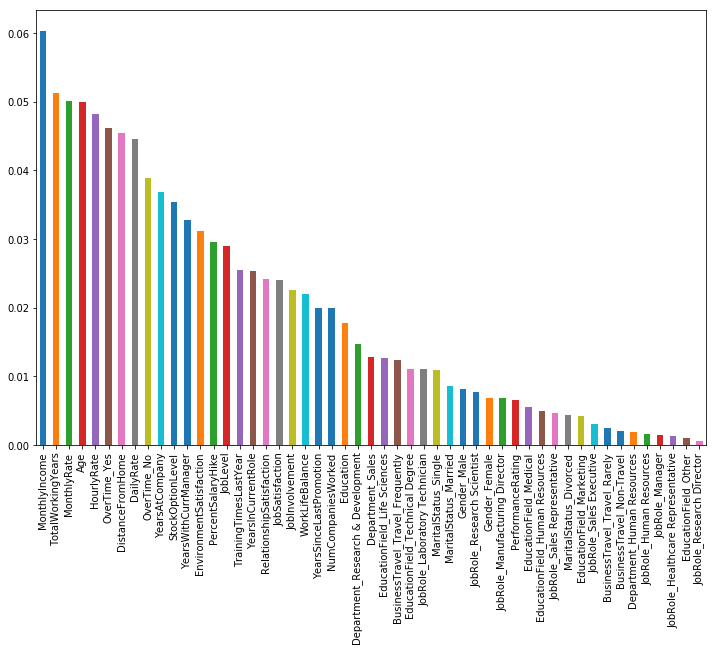

In [43]:
pd.Series(rf_clf.feature_importances_, 
         index=X_train.columns).sort_values(ascending=False).plot(kind='bar', figsize=(12,8));

## AdaBoost

In [44]:
from sklearn.ensemble import AdaBoostClassifier

In [45]:
ada_clf = AdaBoostClassifier()

In [46]:
ada_clf.fit(X_train, y_train)

/home/abhinav/anaconda3/envs/xgbv/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)

In [47]:
print_score(ada_clf, X_train, y_train, X_test, y_test, train=True)

Train Result:

accuracy score: 0.9029

Classification Report: 
              precision    recall  f1-score   support

          0       0.91      0.98      0.94       926
          1       0.81      0.52      0.63       176

avg / total       0.90      0.90      0.89      1102


Confusion Matrix: 
 [[904  22]
 [ 85  91]]

Average Accuracy: 	 0.8721
Accuracy SD: 		 0.0254


In [48]:
print_score(ada_clf, X_train, y_train, X_test, y_test, train=False)

Test Result:

accuracy score: 0.8696

Classification Report: 
              precision    recall  f1-score   support

          0       0.89      0.96      0.92       307
          1       0.68      0.41      0.51        61

avg / total       0.86      0.87      0.86       368


Confusion Matrix: 
 [[295  12]
 [ 36  25]]



****

## AdaBoost  + RandomForest

In [49]:
ada_clf = AdaBoostClassifier(base_estimator=RandomForestClassifier())

In [50]:
ada_clf.fit(X_train, y_train.ravel())

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          learning_rate=1.0, n_estimators=50, random_state=None)

In [51]:
print_score(ada_clf, X_train, y_train, X_test, y_test, train=True)

Train Result:

accuracy score: 1.0000

Classification Report: 
              precision    recall  f1-score   support

          0       1.00      1.00      1.00       926
          1       1.00      1.00      1.00       176

avg / total       1.00      1.00      1.00      1102


Confusion Matrix: 
 [[926   0]
 [  0 176]]

Average Accuracy: 	 0.8585
Accuracy SD: 		 0.0124


In [52]:
print_score(ada_clf, X_train, y_train, X_test, y_test, train=False)

Test Result:

accuracy score: 0.8451

Classification Report: 
              precision    recall  f1-score   support

          0       0.87      0.96      0.91       307
          1       0.58      0.25      0.34        61

avg / total       0.82      0.85      0.82       368


Confusion Matrix: 
 [[296  11]
 [ 46  15]]



## Gradient Boosting Classifier

In [53]:
from sklearn.ensemble import GradientBoostingClassifier

In [54]:
gbc_clf = GradientBoostingClassifier()

In [55]:
gbc_clf.fit(X_train, y_train.ravel())

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [56]:
print_score(gbc_clf, X_train, y_train, X_test, y_test, train=True)

Train Result:

accuracy score: 0.9574

Classification Report: 
              precision    recall  f1-score   support

          0       0.95      1.00      0.98       926
          1       0.99      0.74      0.85       176

avg / total       0.96      0.96      0.95      1102


Confusion Matrix: 
 [[925   1]
 [ 46 130]]

Average Accuracy: 	 0.8658
Accuracy SD: 		 0.0159


In [57]:
print_score(gbc_clf, X_train, y_train, X_test, y_test, train=False)

Test Result:

accuracy score: 0.8614

Classification Report: 
              precision    recall  f1-score   support

          0       0.88      0.97      0.92       307
          1       0.67      0.33      0.44        61

avg / total       0.84      0.86      0.84       368


Confusion Matrix: 
 [[297  10]
 [ 41  20]]



## XGBoost

In [58]:
import xgboost as xgb

In [59]:
xgb_clf = xgb.XGBClassifier()
xgb_clf.fit(X_train, y_train.ravel())

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [60]:
print_score(xgb_clf, X_train, y_train, X_test, y_test, train=True)

Train Result:

accuracy score: 0.9456

Classification Report: 
              precision    recall  f1-score   support

          0       0.94      1.00      0.97       926
          1       0.98      0.67      0.80       176

avg / total       0.95      0.95      0.94      1102


Confusion Matrix: 
 [[924   2]
 [ 58 118]]



/home/abhinav/anaconda3/envs/xgbv/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/abhinav/anaconda3/envs/xgbv/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/abhinav/anaconda3/envs/xgbv/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/abhinav/anaconda3/envs/xgbv/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWar

Average Accuracy: 	 0.8666
Accuracy SD: 		 0.0137


/home/abhinav/anaconda3/envs/xgbv/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [61]:
print_score(xgb_clf, X_train, y_train, X_test, y_test, train=False)

Test Result:

accuracy score: 0.8641

Classification Report: 
              precision    recall  f1-score   support

          0       0.87      0.98      0.92       307
          1       0.74      0.28      0.40        61

avg / total       0.85      0.86      0.84       368


Confusion Matrix: 
 [[301   6]
 [ 44  17]]



/home/abhinav/anaconda3/envs/xgbv/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/abhinav/anaconda3/envs/xgbv/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/abhinav/anaconda3/envs/xgbv/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


*********

# Ensemble of Ensembles

## Method 1: Decision Tree

In [62]:
from sklearn.tree import DecisionTreeClassifier

In [63]:
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [64]:
print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)

Train Result:

accuracy score: 1.0000

Classification Report: 
              precision    recall  f1-score   support

          0       1.00      1.00      1.00       926
          1       1.00      1.00      1.00       176

avg / total       1.00      1.00      1.00      1102


Confusion Matrix: 
 [[926   0]
 [  0 176]]

Average Accuracy: 	 0.7650
Accuracy SD: 		 0.0205


In [65]:
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

Test Result:

accuracy score: 0.7799

Classification Report: 
              precision    recall  f1-score   support

          0       0.88      0.85      0.87       307
          1       0.36      0.41      0.38        61

avg / total       0.79      0.78      0.79       368


Confusion Matrix: 
 [[262  45]
 [ 36  25]]



## Method 2: Random Forest

In [66]:
from sklearn.ensemble import RandomForestClassifier

In [67]:
rf_clf = RandomForestClassifier()

In [68]:
rf_clf.fit(X_train, y_train.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [69]:
print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)

Train Result:

accuracy score: 0.9782

Classification Report: 
              precision    recall  f1-score   support

          0       0.97      1.00      0.99       926
          1       1.00      0.86      0.93       176

avg / total       0.98      0.98      0.98      1102


Confusion Matrix: 
 [[926   0]
 [ 24 152]]

Average Accuracy: 	 0.8558
Accuracy SD: 		 0.0183


In [70]:
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

Test Result:

accuracy score: 0.8560

Classification Report: 
              precision    recall  f1-score   support

          0       0.87      0.98      0.92       307
          1       0.68      0.25      0.36        61

avg / total       0.84      0.86      0.83       368


Confusion Matrix: 
 [[300   7]
 [ 46  15]]



In [71]:
en_en = pd.DataFrame()

In [72]:
en_en['tree_clf'] = pd.DataFrame(tree_clf.predict_proba(X_train))[1]
en_en['rf_clf'] =  pd.DataFrame(rf_clf.predict_proba(X_train))[1]
col_name = en_en.columns
en_en = pd.concat([en_en, pd.DataFrame(y_train).reset_index(drop=True)], axis=1)

In [73]:
en_en.head()

,tree_clf,rf_clf,0
0,0.0,0.0,0
1,0.0,0.3,0
2,1.0,0.8,1
3,0.0,0.0,0
4,0.0,0.1,0


In [74]:
tmp = list(col_name)
tmp.append('ind')
en_en.columns = tmp

In [75]:
en_en.head()

,tree_clf,rf_clf,ind
0,0.0,0.0,0
1,0.0,0.3,0
2,1.0,0.8,1
3,0.0,0.0,0
4,0.0,0.1,0


In [76]:
tmp

['tree_clf', 'rf_clf', 'ind']

****

## Meta Classifier

In [77]:
from sklearn.linear_model import LogisticRegression

In [78]:
m_clf = LogisticRegression(fit_intercept=False)

In [79]:
m_clf.fit(en_en[['tree_clf', 'rf_clf']], en_en['ind'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=False,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [80]:
en_test = pd.DataFrame()

In [81]:
en_test['tree_clf'] = pd.DataFrame(tree_clf.predict_proba(X_test))[1]
en_test['rf_clf'] =  pd.DataFrame(rf_clf.predict_proba(X_test))[1]
col_name = en_test.columns
en_test['combined'] = m_clf.predict(en_test[['tree_clf', 'rf_clf']])

In [82]:
col_name = en_test.columns
tmp = list(col_name)
tmp.append('ind')

In [83]:
tmp

['tree_clf', 'rf_clf', 'combined', 'ind']

In [84]:
en_test = pd.concat([en_test, pd.DataFrame(y_test).reset_index(drop=True)], axis=1)

In [85]:
en_test.columns = tmp

In [86]:
print(pd.crosstab(en_test['ind'], en_test['combined']))

combined    0   1
ind              
0         262  45
1          36  25


In [87]:
print(round(accuracy_score(en_test['ind'], en_test['combined']), 4))

0.7799


In [88]:
print(classification_report(en_test['ind'], en_test['combined']))

             precision    recall  f1-score   support

          0       0.88      0.85      0.87       307
          1       0.36      0.41      0.38        61

avg / total       0.79      0.78      0.79       368



****

## Single Classifier

In [89]:
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [90]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [91]:
df.Attrition.value_counts()/df.Attrition.count()

No     0.838776
Yes    0.161224
Name: Attrition, dtype: float64

In [92]:
from sklearn.ensemble import RandomForestClassifier

In [93]:
from sklearn.ensemble import BaggingClassifier

In [94]:
from sklearn.ensemble import AdaBoostClassifier

In [95]:
class_weight = {0: 0.84, 1: 0.16}

In [96]:
type(y_train)

numpy.ndarray

In [97]:
pd.Series(list(y_train)).value_counts() / pd.Series(list(y_train)).count()

[0]    0.84029
[1]    0.15971
dtype: float64

In [98]:
forest = RandomForestClassifier(class_weight=class_weight)

In [99]:
ada = AdaBoostClassifier(base_estimator=forest, n_estimators=1000, 
                         learning_rate=0.5,
                         random_state=42
                        )

In [100]:
ada.fit(X_train, y_train.ravel())

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=RandomForestClassifier(bootstrap=True, class_weight={0: 0.84, 1: 0.16},
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
          learning_rate=0.5, n_estimators=1000, random_state=42)

In [101]:
print_score(ada, X_train, y_train, X_test, y_test, train=True)
print_score(ada, X_train, y_train, X_test, y_test, train=False)

Train Result:

accuracy score: 1.0000

Classification Report: 
              precision    recall  f1-score   support

          0       1.00      1.00      1.00       926
          1       1.00      1.00      1.00       176

avg / total       1.00      1.00      1.00      1102


Confusion Matrix: 
 [[926   0]
 [  0 176]]

Average Accuracy: 	 0.8503
Accuracy SD: 		 0.0083
Test Result:

accuracy score: 0.8533

Classification Report: 
              precision    recall  f1-score   support

          0       0.85      0.99      0.92       307
          1       0.82      0.15      0.25        61

avg / total       0.85      0.85      0.81       368


Confusion Matrix: 
 [[305   2]
 [ 52   9]]



In [102]:
bag_clf = BaggingClassifier(base_estimator=ada, n_estimators=10,
                            max_samples=1.0, max_features=1.0, bootstrap=True,
                            bootstrap_features=False, n_jobs=-1,
                            random_state=42)

In [ ]:
bag_clf.fit(X_train, y_train.ravel())

In [ ]:
print_score(bag_clf, X_train, y_train, X_test, y_test, train=True)
print_score(bag_clf, X_train, y_train, X_test, y_test, train=False)

*****